# Model Development

<h4>Objectives</h4>

After completing this lab you will be able to:

* Develop prediction models

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [107]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [108]:
df['horsepower'].isnull().sum()

0

<h2>1. Linear Regression and Multiple Linear Regression</h2>


<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
Y: Response \ Variable\\\\
X: Predictor \ Variables
$$

<b> Linear Function </b>
$$ 
Yhat = a + b X
$$

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm= LinearRegression()
lm


LinearRegression()

<b> How could "highway-mpg" help us predict car price? </b>

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable

In [111]:
X = df[['highway-mpg']]
Y = df['price']

In [112]:
lm.fit(X,Y)

LinearRegression()

In [113]:
Yhat = lm.predict(X)
Yhat [0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [114]:
lm.intercept_

38423.3058581574

In [115]:
lm.coef_

array([-821.73337832])

Now we got intercept and slope,

We should get a final linear model with the structure:
    
$$
Yhat = a + b X
$$

<b> Price  = intercept + slope * highway-mpg </b>

In [116]:
Price = 38423.3058581574 + (-821.73337832) * X
Price

,highway-mpg
0,16236.504644
1,16236.504644
2,17058.238022
3,13771.304509
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504644


<h4> Multiple Linear Regression </h4>

<p>What if we want to predict car price using more than one variable?</p>


The equation is given by:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [117]:
Z = df[['horsepower','curb-weight', 'engine-size','highway-mpg']]
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [118]:
Z.isnull().sum()

horsepower     0
curb-weight    0
engine-size    0
highway-mpg    0
dtype: int64

In [119]:
Y =df['price']
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64


In [120]:
lm.fit(Z,Y)

LinearRegression()

In [121]:
lm.intercept_

-15806.624626329234

In [122]:
lm.coef_[0]

53.49574422604913

In [123]:
Price = lm.intercept_ + lm.coef_[0]*df['horsepower']+ lm.coef_[1]*df['curb-weight'] + lm.coef_[2]*df['engine-size'] + lm.coef_[3]*df['highway-mpg']
Price

0      13699.111612
1      13699.111612
2      19051.654702
3      10620.361930
4      15521.314202
           ...     
196    16694.400437
197    19503.679202
198    20475.458380
199    17804.038813
200    17104.075080
Length: 201, dtype: float64

<h2>2. Model Evaluation Using Visualization</h2>

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.



In [124]:
import seaborn as sns
%matplotlib inline

<b> 1.Regression Plot </b>

Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48162.05686546724)

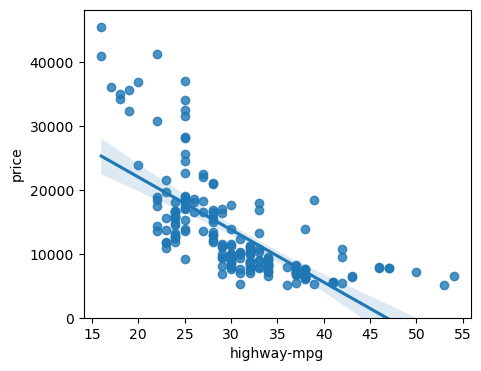

In [125]:
width = 5
height = 4
plt.figure(figsize = (width, height))
sns.regplot(x= "highway-mpg", y = 'price', data = df)
plt.ylim(0,)

(0.0, 47414.1)

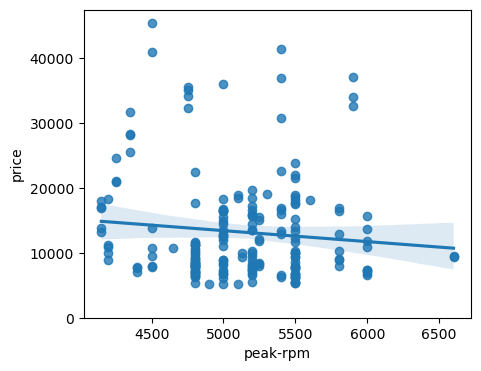

In [126]:
width = 5
height = 4
plt.figure(figsize = (width, height))
sns.regplot(data = df, x = "peak-rpm",y = 'price')
plt.ylim(0,)

<h1>Question:</h1>

Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.

In [127]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


"highway-mpg" more strongly correlated with "price  because the correlation between them is -0.704692 

<b> 2. Residual plot </b>

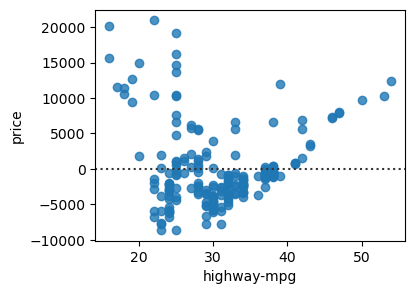

In [128]:
width = 4
height = 3
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

<h2> Multiple Linear Regression </h2>

In [129]:
Yhat = lm.predict(Z)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_11916\2399120697.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'],hist= False, color = "r",label = "Actual Value")
C:\Users\Sabrina\AppData\Local\Temp\ipykernel_11916\2399120697.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

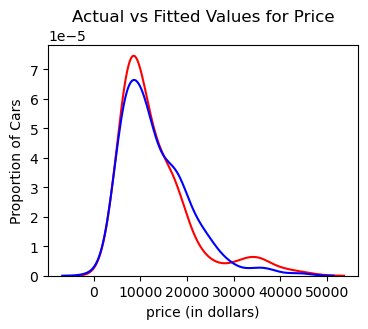

In [130]:
plt.figure(figsize= (width,height))
ax1 = sns.distplot(df['price'],hist= False, color = "r",label = "Actual Value")
sns.distplot(Yhat, hist = False, color = "b", label = "Fitted Values", ax= ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("price (in dollars)")
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()